In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
#export
from fastai import *
from fastai.text import *
import sys,os,os.path
import re

In [3]:
os.getcwd()

'/home/jupyter/mrdbarros/csgo_analyze'

In [4]:
#base_dir='/home/jupyter/mrdbarros/data/CSGO'
#export
base_dir='C:/Users/marcel.barros/Desktop/Projetos/data/CSGO'

In [ ]:
#51716 - 51816
for id_demo in range(51650,51656):
    print("Downloading", id_demo)
    url= "https://www.hltv.org/download/demo/"+str(id_demo)
    new_dir=base_dir+"/"+str(id_demo)
    !mkdir {new_dir}
    file_name=base_dir+"/"+str(id_demo)+"/"+str(id_demo)
    !wget -O {file_name} {url}
    print("Unraring", id_demo)
    !unrar x {file_name} {new_dir}
    !rm -f {file_name}

In [5]:
#export
#base_dir='C:/Users/marcel.barros/Desktop/Projetos/data/CSGO'
base_dir='/home/jupyter/mrdbarros/data/CSGO'
#dest_dir='C:/Users/marcel.barros/Desktop/Projetos/csgo_analyze/data/Raw'
dest_dir='/home/jupyter/mrdbarros/csgo_analyze/data/Raw'

In [67]:
#export
file_id = 0
delete_dir = dest_dir + "/*"
!rm -rf {delete_dir}
for r, d, f in os.walk(base_dir):
    for file in f:
        if '.dem' in file:
            full_file = os.path.join(r,file)
            !go run print_game_state.go {full_file} {file_id} {dest_dir}
            file_id+=1

Map: de_train
Map: de_overpass
Map: de_mirage
Map: de_overpass
Map: de_mirage
Map: de_inferno
Map: de_inferno
Map: de_dust2
Map: de_overpass
Map: de_dust2
Map: de_overpass
error!Erro no processamento do arquivo! demo stream ended unexpectedly (ErrUnexpectedEndOfDemo)
Map: de_inferno
Map: de_mirage
Map: de_overpass
Map: de_train
Map: de_nuke
Map: de_nuke
Map: de_overpass
Map: de_inferno
Map: de_nuke
Map: de_inferno
Map: de_inferno
Map: de_dust2
Map: de_inferno
Map: de_inferno
Map: de_mirage
Map: de_mirage
Map: de_overpass
Map: de_mirage
Map: de_vertigo
Map: de_mirage
Map: de_dust2
Map: de_mirage
Map: de_mirage
Map: de_vertigo
Map: de_mirage
Map: de_mirage
Map: de_nuke
Map: de_dust2
Map: de_dust2
Map: de_nuke
Map: de_mirage
Map: de_mirage
Map: de_overpass
Map: de_train
Map: de_mirage
Map: de_overpass
Map: de_nuke
Map: de_nuke
Map: de_overpass
Map: de_overpass
Map: de_nuke
Map: de_overpass
Map: de_overpass
Map: de_mirage
Map: de_train
Map: de_mirage
Map: de_inferno
Map: de_nuke
Map: de_du

In [6]:
#export
bs=64


In [7]:
#export
path = "/home/jupyter/mrdbarros/csgo_analyze/data"
#path = "C:/Users/marcel.barros/Desktop/Projetos/csgo_analyze/data"

In [8]:
#export
data_lm = (TextList.from_folder(path)
            .filter_by_folder(include=["Raw"]) 
            #.filter_by_folder(include=["de_dust2","de_inferno","de_mirage","de_nuke","de_overpass","de_train","de_vertigo","de_cache"]) 
            .split_by_rand_pct(0.2)
            .label_for_lm()           
            .databunch(bs=bs, num_workers=1))

len(data_lm.vocab.itos),len(data_lm.train_ds)

(144, 126)

In [9]:
data_lm.vocab.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 't_flashbang',
 't_glock_18',
 't_knife',
 'ct_flashbang',
 't_smoke_grenade',
 'ct_p2000',
 'ct_knife',
 'ct_kill',
 'ct_smoke_grenade',
 't_kill',
 't_molotov',
 't_c4',
 't_kevlar_+_helmet',
 'ct_incendiary_grenade',
 't_ak_47',
 'ct_he_grenade',
 'ct_m4a4',
 'ct_kevlar_+_helmet',
 'ct_kevlar_vest',
 'ct_defuse_kit',
 'round_start',
 't_he_grenade',
 'round_end_official',
 'ct_awp',
 't_sg_553',
 't_kevlar_vest',
 't_p250',
 'bomb_plant_begin',
 'ct_ak_47',
 'ct_p250',
 't_desert_eagle',
 'bomb_planted',
 'ct_round_win',
 't_awp',
 'ct_desert_eagle',
 't_round_win',
 'ct_aug',
 'ct_mp9',
 'ct_sg_553',
 't_mac_10',
 '4',
 'ct_famas',
 't_0',
 'ct_molotov',
 't_p2000',
 't_m4a4',
 'ct_0',
 't_galil_ar',
 'ct_ump_45',
 'ct_decoy_grenade',
 't_decoy_grenade',
 'ct_ssg_08',
 't_1',
 'ct_2',
 'ct_five_seven',
 'ct_5',
 't_5',
 'ct_3',
 't_4',
 't_6',
 'ct_4',
 't_7',
 't_3',
 'ct_1',
 'ct_7',
 'ct_6

In [10]:
data_lm

TextLMDataBunch;

Train: LabelList (126 items)
x: LMTextList
xxbos de_mirage ct_kill ct_kill t_p250 ct_kill ct_kill ct_kill ct_round_win ct_p250 round_end_official round_start ct_1 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_+_helmet ct_kevlar_+_helmet ct_mp9 t_c4 ct_smoke_grenade ct_he_grenade ct_kevlar_+_helmet ct_kevlar_+_helmet ct_m4a4 ct_flashbang t_desert_eagle t_desert_eagle t_desert_eagle ct_m4a4 t_desert_eagle ct_smoke_grenade t_desert_eagle ct_flashbang ct_m4a4 ct_mp9 ct_he_grenade ct_smoke_grenade ct_flashbang t_c4 ct_kill ct_kill ct_kill t_c4 ct_kill ct_desert_eagle ct_kill ct_round_win ct_desert_eagle round_end_official round_start ct_2 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_smoke_grenade ct_incendiary_grenade ct_he_grenade ct_defuse_kit ct_defuse_kit ct_smoke_grenade ct_smoke_grenade ct_he_grenade ct_flashbang ct_flashbang ct_incendiary

In [11]:
#export
learn_lm = language_model_learner(data_lm, TransformerXL, drop_mult=1.,pretrained=False)

In [17]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


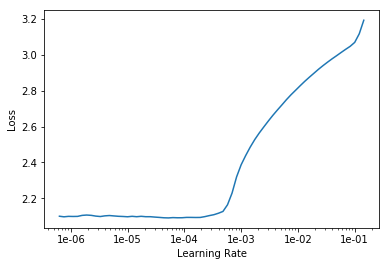

In [18]:
learn_lm.recorder.plot()

In [19]:
lr=1e-5

In [20]:
#export
learn_lm.fit_one_cycle(3, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.088202,2.074859,0.417506,00:37
1,2.084312,2.066118,0.418399,00:37
2,2.077469,2.063465,0.419914,00:37


In [21]:
#export
learn_lm.export('fine_tuned_enc.pkl')
learn_lm.save_encoder("fine_tuned_enc")

In [22]:
#export
def cleanCSGOMatchFile(extractedMatchFilePath):
    f=open(extractedMatchFilePath,'r')
    contents = f.read()
    if len(contents)>50:
        re_map = re.compile("de_.*? ")
        #pdb.set_trace()
        print(extractedMatchFilePath,len(contents))
        current_map = re.findall(re_map,contents)[0]
        #print(contents)
        re_round = re.compile("(round_start(?! round_start).*?round_end_official)")
        all_rounds=re.findall(re_round,contents)
        labeled_samples=splitFullRounds(all_rounds,current_map)
        return labeled_samples
    else:
        !rm -f {extractedMatchFilePath}
    

In [23]:
#export
def splitFullRounds(fullRoundsList, current_map):
    labeled_samples=[]
    invalid_split_round_events=["t_round_win","ct_round_win","round_start","match_started"]
    re_lastEvent= re.compile("(.*) ")
    match_until_previous_round=""
    match_until_previous_round+=current_map
    for one_round in fullRoundsList:
        split_round=re.findall(re_lastEvent,one_round[:int(len(one_round)/1.5)])[0]
        #pdb.set_trace()
        invalid_state_test=any(split_round_event in split_round[1:] for split_round_event in invalid_split_round_events)
        if not invalid_state_test:
            winner = "ct" if "ct_round_win" in one_round else "t"
            labeled_samples.append([match_until_previous_round+" "+split_round,winner])
            match_until_previous_round+=" " + one_round
    return labeled_samples
        
        #print(x_events)

In [24]:
import pdb

In [25]:
delete_path = path+"/Processed/*"
print(delete_path)
!rm -rf {delete_path}

/home/jupyter/mrdbarros/csgo_analyze/data/Processed/*


In [26]:
#export


top_folders = ["train","valid"]
sub_folders  = ["t","ct"]
for top_folder in top_folders:
    for sub_folder in sub_folders:
        new_folder = path + "/Processed/" + top_folder + "/" + sub_folder
        !mkdir -p {new_folder}
valid_size = 0.2
for root, dir_names, files in os.walk(path+'/Raw'):
    for file in files:
        if ".txt" in file:
            #pdb.set_trace()
            parsed_match=cleanCSGOMatchFile(root+"/"+file)
            round_id=0
            folder = "valid" if random.random() < 0.2 else "train"
            if parsed_match:
                for parsed_round in parsed_match:
                    f= open(path+'/Processed/'+folder+"/"+parsed_round[1]+'/'+"r"+str(round_id)+"_"+file,"w+")
                    round_id+=1
                    f.write(parsed_round[0])
                    f.close()

/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_12.txt 27024
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_42.txt 18395
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_36.txt 18692
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_155.txt 30736
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_54.txt 17178
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_78.txt 27520
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_146.txt 16591
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_41.txt 19294
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_116.txt 22568
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_35.txt 17989
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_45.txt 22445
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_2.txt 22151
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_m

/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_82.txt 23262
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_11.txt 25994
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_57.txt 21204
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_5.txt 22533
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_6.txt 21720
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_68.txt 26406
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_75.txt 28126
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_137.txt 15536
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_86.txt 24981
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_112.txt 21074
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_74.txt 27638
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_120.txt 20184


In [27]:
#export
def valid_train_split(file_name):
    #pdb.set_trace()
    return True if file_name.parents[1].stem == "valid" else False



data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             .filter_by_folder(include=["Processed"]) 
             .split_by_valid_func(valid_train_split)
             .label_from_folder(classes=['t', 'ct'])
             .databunch(bs=bs, num_workers=1))

In [28]:
data_clas

TextClasDataBunch;

Train: LabelList (3008 items)
x: TextList
xxbos de_overpass round_start ct_0 t_0 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_vest t_kevlar_vest t_kevlar_vest ct_kevlar_vest ct_kevlar_vest t_smoke_grenade t_flashbang t_flashbang t_decoy_grenade t_c4 ct_kevlar_vest t_kevlar_vest ct_defuse_kit t_kevlar_vest ct_flashbang ct_flashbang t_c4 t_c4 t_c4 t_kill ct_kill ct_kill ct_kill t_kill t_glock_18 t_kill t_p2000 bomb_plant_begin ct_kill t_kill bomb_plant_begin ct_kill ct_round_win ct_defuse_kit round_end_official round_start ct_1 t_0 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 t_c4 t_kevlar_+_helmet ct_kevlar_+_helmet t_ak_47 t_c4 t_ak_47 ct_kevlar_+_helmet ct_kevlar_+_helmet t_p250 ct_kevlar_+_he

In [29]:
data_clas.show_batch()

text,target
xxbos de_dust2 round_start ct_1 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_+_helmet ct_mp9 ct_smoke_grenade ct_incendiary_grenade ct_kevlar_+_helmet ct_he_grenade ct_flashbang ct_kevlar_+_helmet ct_m4a4 ct_smoke_grenade ct_he_grenade ct_kevlar_+_helmet ct_flashbang t_c4 ct_defuse_kit ct_kevlar_+_helmet ct_ssg_08 ct_smoke_grenade ct_flashbang ct_flashbang t_desert_eagle t_kevlar_vest t_kevlar_+_helmet ct_mp9 t_desert_eagle t_desert_eagle t_kevlar_vest ct_smoke_grenade ct_incendiary_grenade t_kevlar_vest ct_flashbang t_smoke_grenade t_desert_eagle ct_flashbang t_flashbang t_flashbang t_smoke_grenade ct_ump_45 t_flashbang t_smoke_grenade ct_incendiary_grenade ct_smoke_grenade ct_he_grenade ct_flashbang t_ssg_08 t_he_grenade t_decoy_grenade ct_defuse_kit ct_kill ct_kill t_c4 t_kill ct_kill t_kill,t
xxbos de_dust2 round_start ct_1 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_+_helmet ct_mp9 ct_smoke_grenade ct_incendiary_grenade ct_kevlar_+_helmet ct_he_grenade ct_flashbang ct_kevlar_+_helmet ct_m4a4 ct_smoke_grenade ct_he_grenade ct_kevlar_+_helmet ct_flashbang t_c4 ct_defuse_kit ct_kevlar_+_helmet ct_ssg_08 ct_smoke_grenade ct_flashbang ct_flashbang t_desert_eagle t_kevlar_vest t_kevlar_+_helmet ct_mp9 t_desert_eagle t_desert_eagle t_kevlar_vest ct_smoke_grenade ct_incendiary_grenade t_kevlar_vest ct_flashbang t_smoke_grenade t_desert_eagle ct_flashbang t_flashbang t_flashbang t_smoke_grenade ct_ump_45 t_flashbang t_smoke_grenade ct_incendiary_grenade ct_smoke_grenade ct_he_grenade ct_flashbang t_ssg_08 t_he_grenade t_decoy_grenade ct_defuse_kit ct_kill ct_kill t_c4 t_kill ct_kill t_kill,t
xxbos de_dust2 round_start ct_1 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_+_helmet ct_mp9 ct_smoke_grenade ct_incendiary_grenade ct_kevlar_+_helmet ct_he_grenade ct_flashbang ct_kevlar_+_helmet ct_m4a4 ct_smoke_grenade ct_he_grenade ct_kevlar_+_helmet ct_flashbang t_c4 ct_defuse_kit ct_kevlar_+_helmet ct_ssg_08 ct_smoke_grenade ct_flashbang ct_flashbang t_desert_eagle t_kevlar_vest t_kevlar_+_helmet ct_mp9 t_desert_eagle t_desert_eagle t_kevlar_vest ct_smoke_grenade ct_incendiary_grenade t_kevlar_vest ct_flashbang t_smoke_grenade t_desert_eagle ct_flashbang t_flashbang t_flashbang t_smoke_grenade ct_ump_45 t_flashbang t_smoke_grenade ct_incendiary_grenade ct_smoke_grenade ct_he_grenade ct_flashbang t_ssg_08 t_he_grenade t_decoy_grenade ct_defuse_kit ct_kill ct_kill t_c4 t_kill ct_kill t_kill,t
xxbos de_dust2 round_start ct_1 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_+_helmet ct_mp9 ct_smoke_grenade ct_incendiary_grenade ct_kevlar_+_helmet ct_he_grenade ct_flashbang ct_kevlar_+_helmet ct_m4a4 ct_smoke_grenade ct_he_grenade ct_kevlar_+_helmet ct_flashbang t_c4 ct_defuse_kit ct_kevlar_+_helmet ct_ssg_08 ct_smoke_grenade ct_flashbang ct_flashbang t_desert_eagle t_kevlar_vest t_kevlar_+_helmet ct_mp9 t_desert_eagle t_desert_eagle t_kevlar_vest ct_smoke_grenade ct_incendiary_grenade t_kevlar_vest ct_flashbang t_smoke_grenade t_desert_eagle ct_flashbang t_flashbang t_flashbang t_smoke_grenade ct_ump_45 t_flashbang t_smoke_grenade ct_incendiary_grenade ct_smoke_grenade ct_he_grenade ct_flashbang t_ssg_08 t_he_grenade t_decoy_grenade ct_defuse_kit ct_kill ct_kill t_c4 t_kill ct_kill t_kill,t
xxbos de_nuke round_start ct_0 t_0 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_c4 xxwrep 4 ct_kevlar_vest ct_smoke_grenade ct_defuse_kit t_p250 t_kevlar_vest t_kevlar_vest t_glock_18 t_kevlar_vest t_p250 t_kevlar_vest t_flashbang t_p250 t_kill ct_kill ct_kill ct_p2000 ct_kill t_kill ct_kill ct_kill ct_round_win ct_p250 round_end_offici

In [30]:
path

'/home/jupyter/mrdbarros/csgo_analyze/data'

In [31]:
#export
learn = text_classifier_learner(data_clas, TransformerXL, drop_mult=0.5)
#pdb.set_trace()
learn.load_encoder('fine_tuned_enc')

/opt/anaconda3/lib/python3.7/site-packages/fastai/text/learner.py:297: UserWarning: There are no pretrained weights for that architecture yet!
  warn("There are no pretrained weights for that architecture yet!")


In [32]:
bs=64

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


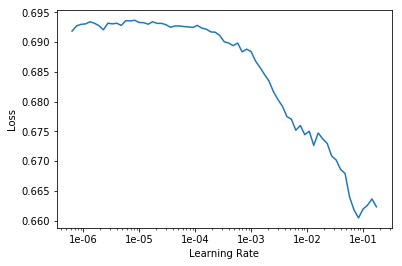

In [34]:
learn.recorder.plot(skip_end = 15)

In [35]:
#export
learn.fit_one_cycle(2, max_lr=slice(5e-3,4e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.635816,0.638362,0.617680,03:27
1,0.618011,0.624381,0.630939,03:26


In [36]:
learn.export('initial_clas.pkl')

In [39]:
test_round = "de_dust2  round_start ct_0 t_0 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_vest ct_flashbang ct_flashbang ct_kevlar_vest ct_decoy_grenade ct_kevlar_vest t_flashbang ct_decoy_grenade t_kevlar_vest ct_he_grenade ct_smoke_grenade ct_defuse_kit t_kevlar_vest t_kevlar_vest t_smoke_grenade t_kevlar_vest t_flashbang bomb_plant_begin bomb_planted ct_kill t_kill ct_kill t_kill ct_kill t_kill ct_defuse_kit ct_round_win t_kill round_end_official round_start ct_1 t_0 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_kevlar_+_helmet ct_kevlar_+_helmet ct_defuse_kit ct_ump_45 ct_m4a4 ct_smoke_grenade ct_kevlar_+_helmet ct_flashbang ct_he_grenade ct_flashbang ct_smoke_grenade ct_mp7 ct_famas ct_kevlar_+_helmet ct_smoke_grenade ct_flashbang ct_smoke_grenade ct_he_grenade t_desert_eagle t_kevlar_+_helmet t_desert_eagle t_desert_eagle ct_mp9 ct_flashbang ct_he_grenade t_kevlar_vest ct_kevlar_vest ct_incendiary_grenade ct_smoke_grenade ct_he_grenade ct_flashbang t_desert_eagle t_c4 t_kevlar_vest t_desert_eagle t_kevlar_+_helmet ct_kill t_c4 ct_kill ct_kill t_kill ct_kill ct_kill ct_round_win ct_mp9 round_end_official round_start ct_2 t_0 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_smoke_grenade ct_incendiary_grenade ct_he_grenade ct_flashbang t_sg_553 t_kevlar_+_helmet ct_incendiary_grenade ct_smoke_grenade ct_he_grenade ct_smoke_grenade ct_defuse_kit ct_incendiary_grenade ct_he_grenade ct_flashbang t_kevlar_+_helmet t_ak_47 t_smoke_grenade t_ak_47 ct_m4a4 t_kevlar_+_helmet t_ak_47 t_kevlar_+_helmet ct_kevlar_vest t_flashbang t_smoke_grenade t_flashbang t_flashbang ct_flashbang ct_flashbang ct_smoke_grenade ct_incendiary_grenade ct_flashbang t_sg_553 ct_flashbang t_kevlar_+_helmet t_smoke_grenade t_he_grenade t_flashbang t_flashbang t_flashbang t_flashbang t_kill ct_kill t_kill t_smoke_grenade ct_kill bomb_plant_begin ct_flashbang bomb_planted t_kill ct_defuse_kit t_kill t_kill t_round_win round_end_official round_start ct_2 t_1 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_c4 ct_kevlar_vest t_kevlar_+_helmet ct_awp t_smoke_grenade ct_decoy_grenade t_molotov t_flashbang t_flashbang t_smoke_grenade t_kevlar_+_helmet t_sg_553 t_molotov ct_ump_45 t_ak_47 ct_kevlar_vest t_flashbang ct_kevlar_vest t_sg_553 t_molotov t_smoke_grenade ct_smoke_grenade t_flashbang ct_he_grenade t_flashbang ct_incendiary_grenade t_ak_47 ct_flashbang ct_kevlar_vest t_flashbang ct_desert_eagle ct_smoke_grenade ct_famas ct_kevlar_+_helmet ct_famas ct_smoke_grenade t_ak_47 ct_flashbang t_ak_47 t_molotov t_smoke_grenade t_flashbang t_flashbang t_ak_47 t_sg_553 t_smoke_grenade t_c4 t_flashbang t_flashbang t_c4 t_kill ct_kill bomb_plant_begin bomb_planted ct_ak_47 ct_molotov t_round_win round_end_official round_start ct_2 t_2 ct_knife ct_p2000 t_knife t_glock_18 t_c4 t_smoke_grenade t_flashbang ct_desert_eagle ct_p2000 t_molotov t_flashbang t_flashbang ct_smoke_grenade t_flashbang t_mac_10 t_flashbang t_kevlar_+_helmet t_smoke_grenade t_molotov t_smoke_grenade t_molotov t_flashbang t_flashbang t_molotov t_smoke_grenade t_flashbang t_flashbang ct_smoke_grenade ct_flashbang"

In [40]:
splitted_round = test_round.split()
current_round_state=""
for word in splitted_round:
    current_round_state += word + " "
    print(word,"-",learn.predict(current_round_state))

de_dust2 - (Category t, tensor(0), tensor([0.8644, 0.1356]))
round_start - (Category t, tensor(0), tensor([0.5383, 0.4617]))
ct_0 - (Category ct, tensor(1), tensor([0.4364, 0.5636]))
t_0 - (Category ct, tensor(1), tensor([0.2830, 0.7170]))
t_knife - (Category ct, tensor(1), tensor([0.0326, 0.9674]))
t_glock_18 - (Category ct, tensor(1), tensor([0.0493, 0.9507]))
ct_knife - (Category ct, tensor(1), tensor([0.1347, 0.8653]))
ct_p2000 - (Category ct, tensor(1), tensor([0.0834, 0.9166]))
ct_knife - (Category ct, tensor(1), tensor([0.1927, 0.8073]))
ct_p2000 - (Category ct, tensor(1), tensor([0.1235, 0.8765]))
ct_knife - (Category ct, tensor(1), tensor([0.2374, 0.7626]))
ct_p2000 - (Category ct, tensor(1), tensor([0.1702, 0.8298]))
t_knife - (Category ct, tensor(1), tensor([0.0328, 0.9672]))
t_glock_18 - (Category ct, tensor(1), tensor([0.0733, 0.9267]))
ct_knife - (Category ct, tensor(1), tensor([0.1578, 0.8422]))
ct_p2000 - (Category ct, tensor(1), tensor([0.1204, 0.8796]))
t_knife - (Cat

t_glock_18 - (Category ct, tensor(1), tensor([0.1391, 0.8609]))
t_knife - (Category ct, tensor(1), tensor([0.0738, 0.9262]))
t_glock_18 - (Category ct, tensor(1), tensor([0.1158, 0.8842]))
t_c4 - (Category ct, tensor(1), tensor([0.0422, 0.9578]))
ct_smoke_grenade - (Category ct, tensor(1), tensor([0.0449, 0.9551]))
ct_incendiary_grenade - (Category ct, tensor(1), tensor([0.0436, 0.9564]))
ct_he_grenade - (Category ct, tensor(1), tensor([0.0460, 0.9540]))
ct_flashbang - (Category ct, tensor(1), tensor([0.0451, 0.9549]))
t_sg_553 - (Category ct, tensor(1), tensor([0.1031, 0.8969]))
t_kevlar_+_helmet - (Category ct, tensor(1), tensor([0.1170, 0.8830]))
ct_incendiary_grenade - (Category ct, tensor(1), tensor([0.1637, 0.8363]))
ct_smoke_grenade - (Category ct, tensor(1), tensor([0.1318, 0.8682]))
ct_he_grenade - (Category ct, tensor(1), tensor([0.1280, 0.8720]))
ct_smoke_grenade - (Category ct, tensor(1), tensor([0.1226, 0.8774]))
ct_defuse_kit - (Category ct, tensor(1), tensor([0.1307, 0.8

bomb_plant_begin - (Category t, tensor(0), tensor([0.5128, 0.4872]))
bomb_planted - (Category ct, tensor(1), tensor([0.4359, 0.5641]))
ct_ak_47 - (Category t, tensor(0), tensor([0.5053, 0.4947]))
ct_molotov - (Category t, tensor(0), tensor([0.5488, 0.4512]))
t_round_win - (Category ct, tensor(1), tensor([0.3376, 0.6624]))
round_end_official - (Category ct, tensor(1), tensor([0.4661, 0.5339]))
round_start - (Category t, tensor(0), tensor([0.5913, 0.4087]))
ct_2 - (Category ct, tensor(1), tensor([0.3228, 0.6772]))
t_2 - (Category ct, tensor(1), tensor([0.4682, 0.5318]))
ct_knife - (Category ct, tensor(1), tensor([0.4936, 0.5064]))
ct_p2000 - (Category ct, tensor(1), tensor([0.4823, 0.5177]))
t_knife - (Category ct, tensor(1), tensor([0.2368, 0.7632]))
t_glock_18 - (Category ct, tensor(1), tensor([0.4712, 0.5288]))
t_c4 - (Category t, tensor(0), tensor([0.6616, 0.3384]))
t_smoke_grenade - (Category t, tensor(0), tensor([0.7702, 0.2298]))
t_flashbang - (Category t, tensor(0), tensor([0.730

In [71]:

#learn.data.vocab.save('initial_clas_vocab.pkl')

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-5))

In [ ]:
learn.to_fp32().save(mdl_path/lm_fns[0], with_opt=False)
learn.data.vocab.save(mdl_path/(lm_fns[1] + '.pkl'))